In [ ]:
# Title: Data Preprocessing for Prediction of Perinatal Asphyxia
# Author: Cephas Ekow Biney
# Institution: Kwame Nkrumah University of Science and Technology (KNUST)
# Date: 6th October, 2025.
# Description: 
#               This notebook handles the cleaning, encoding, and preparation of neonatal
#               data for machine learning modeling.

In [16]:
# Libraries Used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading the Dataset
data = pd.read_csv("simulation1.csv")

# Inspecting first few records
data.head()

# Checking missing values (In this case, the simulated data did not have missing values)
#print("\nMissing Values:")
#print(data.isnull().sum())

,patient_id,maternal_age (in yrs),birth_weight (in g),gestational_age (in weeks),delivery_method,Placental_anomalies,sex_of_fetus,parity,illness_during_pregnancy,labor_complications,PROM,status_of_amniotic_fluid,presentation_of_fetus,maternal_comorbidities,birth_asphyxia
0,1,30,3600,37,Vaginal,No,Male,Primi,No,Yes,No,Meconium stained,Non-cephalic,Yes,1
1,2,32,3093,37,Vaginal,No,Female,Multi,No,No,No,Meconium stained,Cephalic,No,0
2,3,26,3003,35,Cesarean,No,Female,Primi,No,Yes,No,Meconium stained,Cephalic,No,0
3,4,33,2754,33,Cesarean,Yes,Male,Multi,No,Yes,Yes,Clear,Non-cephalic,Yes,1
4,5,25,3285,32,Cesarean,Yes,Male,Multi,Yes,Yes,Yes,Meconium stained,Non-cephalic,Yes,1


In [10]:
# Handling the Missing Data
# Missing values were minimal and handled using simple imputation
# (mean for numerical variables, and mode for categorical variables)

# Identifying the numerical and categorical columns
numeric_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

# Imputing numeric columns with mean
#for col in numeric_cols:
#   data[col].fillna(data[col].mean(), inplace=True)
# 
# Imputing categorical columns with mode
# for col in categorical_cols:
#   data[col].fillna(data[col].mode()[0], inplace=True)
# 
# Rechecking for missing values
#print("\nMissing Values:")
#print(data.isnull().sum())


In [11]:
# Encoding Categorical Variables
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])


Class Distribution for target variable:
birth_asphyxia
0    1193
1     807
Name: count, dtype: int64


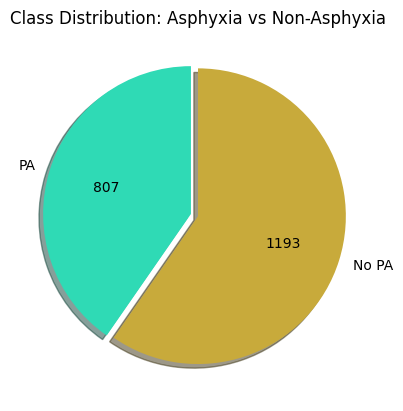

In [15]:
# Exploring the Class Distribution
print("\nClass Distribution for target variable:")
print(data["birth_asphyxia"].value_counts())

labels = ["PA", "No PA"]
sizes = [807, 1193]
colors = ["#2FDAB5", "#c8aa3b"]
explode = (0.05, 0)

#To show actual numbers
def absolute_value(val):
    total = sum(sizes)
    count = int(round(val/100 * total))
    return f"{count}"

#Creating Pie Chart
plt.pie(sizes, labels=labels, colors=colors, autopct=absolute_value,
        startangle=90, explode=explode, shadow=True)
plt.title("Class Distribution: Asphyxia vs Non-Asphyxia")
plt.show()

In [18]:
# Handling Class Imbalance (OptionalFuture Improvement)

# NOTE: The original thesis analysis did not apply class imbalance techniques.
# This section demonstrates how SMOTE could be used to address class imbalance
# for future studies.

# Uncomment the lines below to apply SMOTE

X = data.drop(["patient_id", "birth_asphyxia"], axis=1)
y = data["birth_asphyxia"]

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
# Splitting Dataset into Train (70%), Validation (20%) and Test (10%) Sets

# Step 1: Split the data into 90% training+validation and 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Split the remaining 90% data into train (70%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

# Final split:
# 70% for training
# 20% for validation
# 10% for test

In [20]:
# Saving pre-processed Data
cleaned_data = pd.concat([X, y], axis = 1)
cleaned_data.to_csv("cleaned_data.csv", index=False)

print("\nData Preprocessing Complete.")
print("\nCleaned dataset saved to cleaned_data.csv.")


Data Preprocessing Complete.

Cleaned dataset saved to cleaned_data.csv.
